# Customer Churn Analysis/Prediction

 Customer Churn Analysis is the process of understanding why customers stop doing business with a company. This analysis is critical for businesses across various industries, as retaining existing customers is often more cost-effective than acquiring new ones

Churn refers to the loss of customers over a specific period. It can be measured as a percentage of total customers or in absolute numbers.

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Importing data

In [2]:
df = pd.read_csv("Customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Description of Columns

customerID: Unique identifier for each customer.

gender: Gender of the customer (e.g., Male, Female).

SeniorCitizen: Indicates if the customer is a senior citizen (1 = Yes, 0 = No).

Partner: Indicates if the customer has a partner (Yes/No).

Dependents: Indicates if the customer has dependents (Yes/No).

tenure: Number of months the customer has been with the company.

PhoneService: Indicates if the customer has phone service (Yes/No).

MultipleLines: Indicates if the customer has multiple lines (Yes/No).

InternetService: Type of internet service provided (e.g., DSL, Fiber optic, No).

OnlineSecurity: Indicates if the customer has online security (Yes/No).

DeviceProtection: Indicates if the customer has device protection (Yes/No).

TechSupport: Indicates if the customer has tech support (Yes/No).

StreamingTV: Indicates if the customer has streaming TV service (Yes/No).

StreamingMovies: Indicates if the customer has streaming movies service (Yes/No).

Contract: Type of contract the customer has (e.g., Month-to-month, One year, Two year).

PaperlessBilling: Indicates if the customer uses paperless billing (Yes/No).

PaymentMethod: Method of payment (e.g.,Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The monthly charge for the customer’s services.

TotalCharges: Total amount charged to the customer over their tenure.

Churn: Indicates whether the customer has churned (Yes/No).

## Exploratory Data Analysis

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.drop('customerID',axis=1,inplace=True)

In [6]:
df=df.dropna()
df.shape

(7043, 20)

In [7]:
df[df.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


## Data Visualization

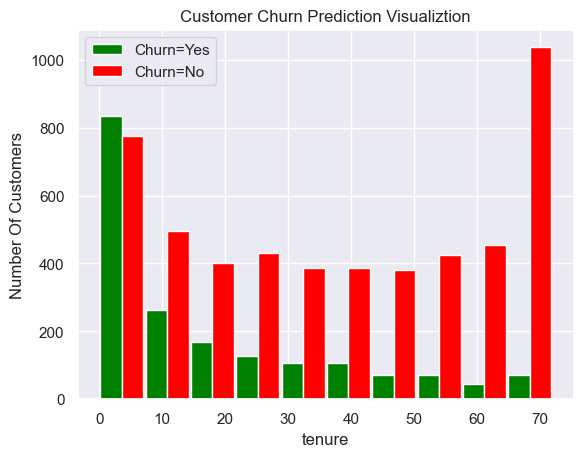

In [8]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

### We Observe that tenure is inversely proportional to Churn

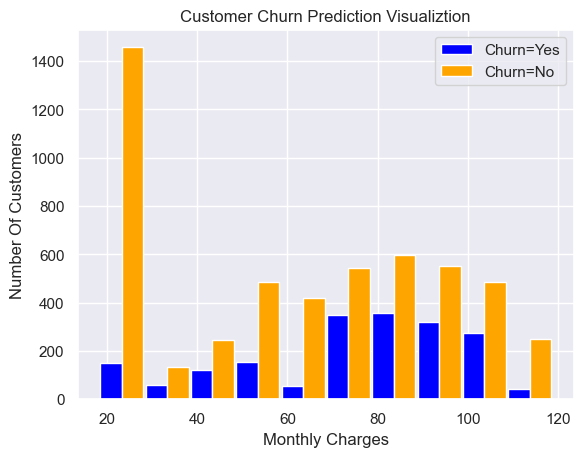

In [9]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['blue','orange'],label=['Churn=Yes','Churn=No'])
plt.legend()

### We Observe that higher monthly charges lead to more Churn

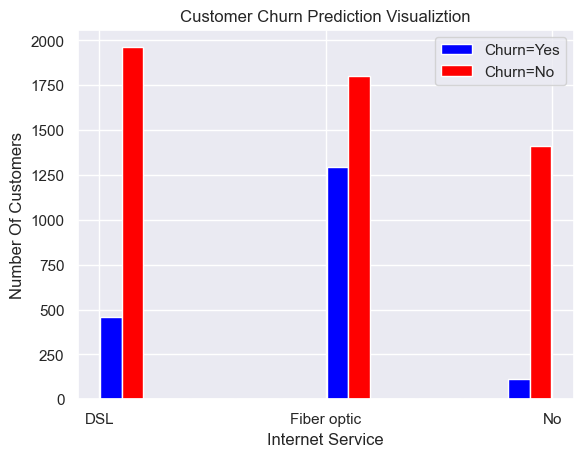

In [10]:
ins_churn_no = df[df.Churn=='No'].InternetService      
ins_churn_yes = df[df.Churn=='Yes'].InternetService     

plt.xlabel("Internet Service")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([ins_churn_yes, ins_churn_no], rwidth=0.95, color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

### We Observe that the people opting for "Fiber Optic" Internet Service Churn more so we need to make improvements with it

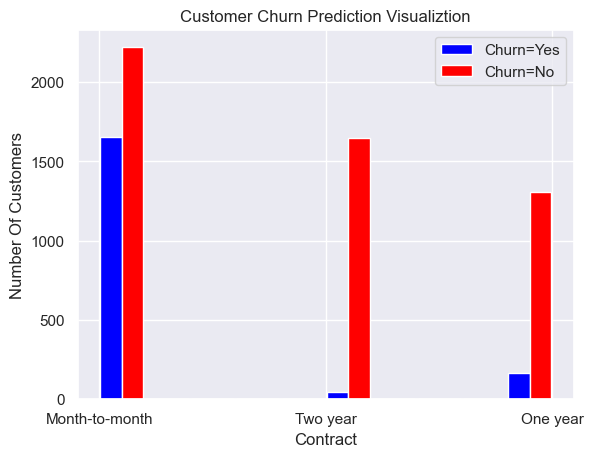

In [11]:
con_churn_no = df[df.Churn=='No'].Contract      
con_churn_yes = df[df.Churn=='Yes'].Contract     

plt.xlabel("Contract")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([con_churn_yes, con_churn_no], rwidth=0.95, color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

### We Observe that people who are on a "Month to Month" contract tend to churn more when compared to people having longer contracts.

In [12]:
def unique_values(df):
    for column in df:
        if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [13]:
unique_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [14]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [15]:
unique_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


# Machine Learning Models

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
ss = StandardScaler()

In [17]:
le_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [18]:
ss_columns = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [19]:
for column in le_columns:
    df[column] = le.fit_transform(df[column])
    
for column in ss_columns:
    df[column] = ss.fit_transform(df[column].values.reshape(-1,1))

ValueError: could not convert string to float: ' '

### Since there are some empty spaces in the dataframe we'll have to get rid of them

In [20]:
import numpy as np
df.replace(' ', np.nan, inplace=True)

In [21]:
df.dropna(axis=0,inplace=True)

In [22]:
for column in le_columns:
    df[column] = le.fit_transform(df[column])
    
for column in ss_columns:
    df[column] = ss.fit_transform(df[column].values.reshape(-1,1))

### Correlation Map

<Axes: >

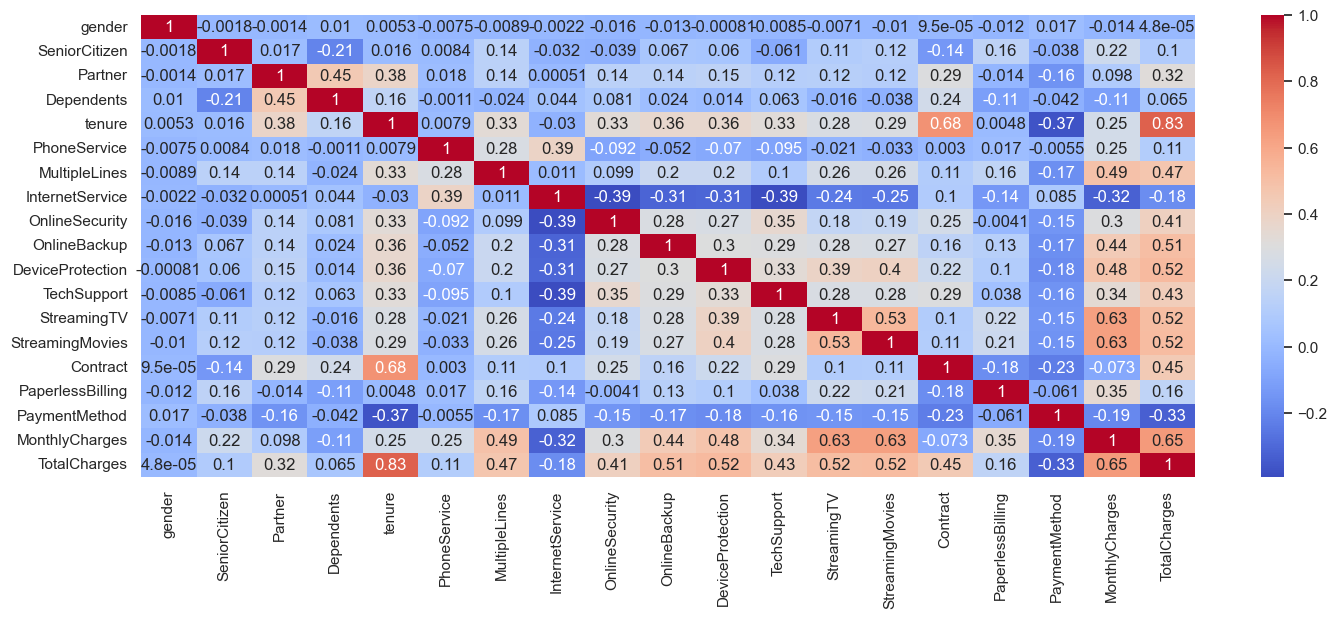

In [23]:
df_sub = df.iloc[:, :-1]
corr = df_sub.corr()
plt.figure(figsize=(17, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Model Training


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [25]:
x = df.iloc[:, :-1] 
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Logistic Regression

In [26]:
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)

#### Decision Tree Classifier

In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

#### Support Vector Classifier

In [28]:
svc = SVC(random_state=42)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

#### Random Forest Classifier

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

### Accuracy Metrics and Classification Report

In [30]:
from sklearn.metrics import accuracy_score, classification_report

#### Logistic Regression

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 0.7981042654028436
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1549
         Yes       0.65      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



#### Decision Tree Classifier

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.7127962085308057
              precision    recall  f1-score   support

          No       0.81      0.79      0.80      1549
         Yes       0.46      0.49      0.48       561

    accuracy                           0.71      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.71      0.72      2110



#### Support Vector Classifier

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

Accuracy: 0.795734597156398
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1549
         Yes       0.67      0.46      0.54       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



#### Random Forest Classifier

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7829383886255924
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1549
         Yes       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



### From above we can conclude the following accuracies.


#### Logistic Regression --> 79.81% ~ 80%
#### Decision Tree --> 71.27% ~ 71%
#### Support Vector Classifier --> 79.57%
#### Random Forest Classifier --> 78.29% ~ 78%

### Hence, We can conclude that Logistic Regression secured the highest accuracy and is the best predictor.

## Conclusion

Customer churn analysis is vital for businesses to understand the underlying reasons for customer attrition and to implement effective retention strategies. By leveraging data and predictive modeling, companies can proactively address customer concerns, enhance satisfaction, and ultimately improve their bottom line.